In [2]:
import numpy as np
import matplotlib.pyplot as plt

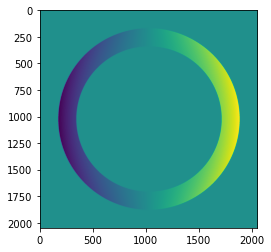

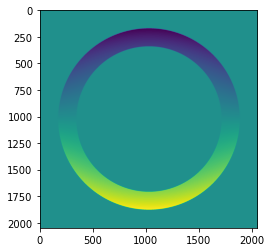

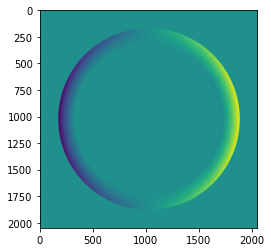

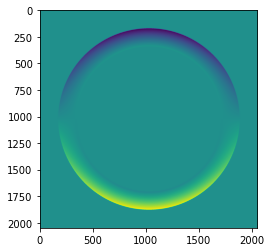

In [22]:
N = 2048

x = np.linspace(-1.2, 1.2, N)
y = x.copy()
x, y = np.meshgrid(x, y)
r = np.hypot(x, y)
theta = np.arctan2(y, x)

domain = (0.8 < r) & (r < 1.0)

astigmatism_x = r**2 * np.cos(theta)
astigmatism_y = r**2 * np.sin(theta)
coma_third_x = (3*r**3 - 2 * r) * np.cos(theta)
coma_third_y = (3*r**3 - 2 * r) * np.sin(theta)

plt.figure(figsize=(4, 4))
plt.imshow(astigmatism_x * domain)

plt.figure(figsize=(4, 4))
plt.imshow(astigmatism_y * domain)

plt.figure(figsize=(4, 4))
plt.imshow(coma_third_x * domain)

plt.figure(figsize=(4, 4))
plt.imshow(coma_third_y * domain)

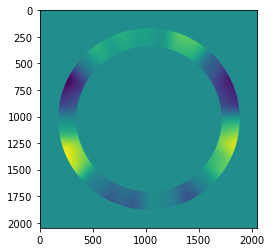

In [26]:
roundness_error = r**2 * (np.sin(3.0 * theta) + 0.8 * np.sin(5.0 * theta + 0.2) + 0.2 * np.sin(10.0 * theta) + 0.1 * np.cos(20.0 * theta))
plt.figure(figsize=(4, 4))
plt.imshow(roundness_error * domain)

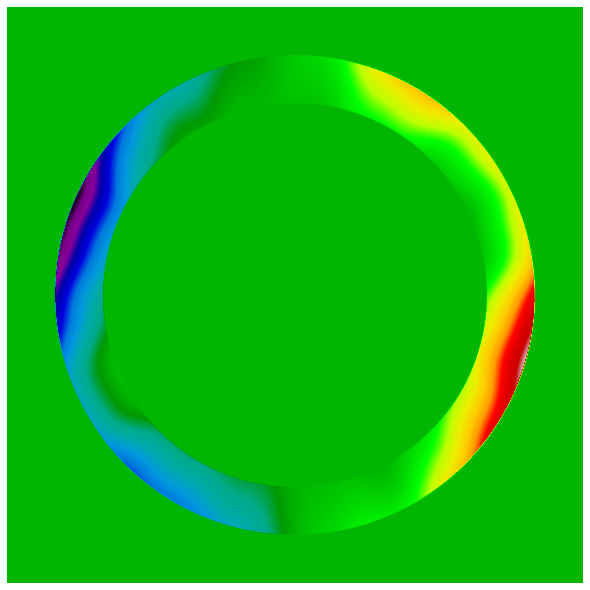

In [45]:
aberration = 1.0 * astigmatism_x + 1.0 * coma_third_x + 0.5 * roundness_error
aberration[~domain] = 0.0

fig = plt.figure(figsize=(8, 8))
plt.axis('off')
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(aberration, cmap='nipy_spectral')
fig.savefig('../resource/chap1/aberration.png')